In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import scipy.stats as stats

In [3]:
# Load data from the Excel file
df = pd.read_excel('Thesis_V6.xlsx')

In [4]:
df

,FID,Lat,Long,GR (Recharge),Precipitation,ET_pot,Prec_seasonality,Temp_seasonality,Aridity,DEM,...,Landuse,Rock type,Recharge fraction,a,alpha,b,beta,scale,Location,Duration(24hrs)
0,0,37.30,-80.10,27.0,998,1213,11,7894,1.135838,373,...,14,13,0.027054,10.216609,-0.569130,10.270910,-0.725667,0.948149,0.979379,0.120018
1,1,46.30,-119.90,119.0,191,1118,43,7596,5.994595,278,...,12,14,0.623037,10.216609,-0.569130,10.270910,-0.725667,0.948149,0.979379,0.120018
2,2,31.80,-110.80,3.0,503,1470,73,6429,2.644161,1299,...,6,1,0.005964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,51.10,-1.30,207.0,760,708,20,4686,0.946237,67,...,12,5,0.272368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,51.10,-1.30,300.0,760,708,20,4686,0.946237,67,...,12,5,0.394737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,5232,52.60,0.88,260.0,628,642,12,4858,0.945428,67,...,12,5,0.414013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5233,5233,54.52,-1.87,690.0,803,612,14,4450,0.764045,142,...,10,13,0.859278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5234,5234,52.30,-2.58,355.0,692,647,12,4548,0.864973,79,...,12,13,0.513006,5.624339,-0.566848,1.288658,-0.611928,0.992163,0.990222,0.072248
5235,5235,51.50,-1.53,234.0,705,677,16,4718,0.957747,146,...,12,5,0.331915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop rows with missing values
df = df.dropna(subset=['Precipitation', 'Recharge fraction'])

# Removing any rows with NaN values
df.dropna(inplace=True) 

In [7]:
df["Aridity_new"] = 1 / df["Aridity"]

# Define conditions for each region
humid = df["Aridity_new"] > 0.65
dry_sub_humid = (df["Aridity_new"] > 0.50) & (df["Aridity_new"] <= 0.65)
semi_arid = (df["Aridity_new"] > 0.20) & (df["Aridity_new"] <= 0.50)
arid = (df["Aridity_new"] > 0.05) & (df["Aridity_new"] <= 0.20)
#hyper_arid = df["Aridity_new"] <= 0.05

# Filter data for each region
df_humid = df[humid]
df_dry_sub_humid = df[dry_sub_humid]
df_semi_arid = df[semi_arid]
df_arid = df[arid]
#df_hyper_arid = df[hyper_arid]

# Dictionary of datasets for iteration with AI scale
datasets = {
    "Humid (AI > 0.65)": (df_humid, "green"),
    "Dry Sub-Humid (0.50 < AI ≤ 0.65)": (df_dry_sub_humid, "blue"),
    "Semi-Arid (0.20 < AI ≤ 0.50)": (df_semi_arid, "orange"),
    "Arid (0.05 < AI ≤ 0.20)": (df_arid, "red")
}



# Climate zone for precipitation

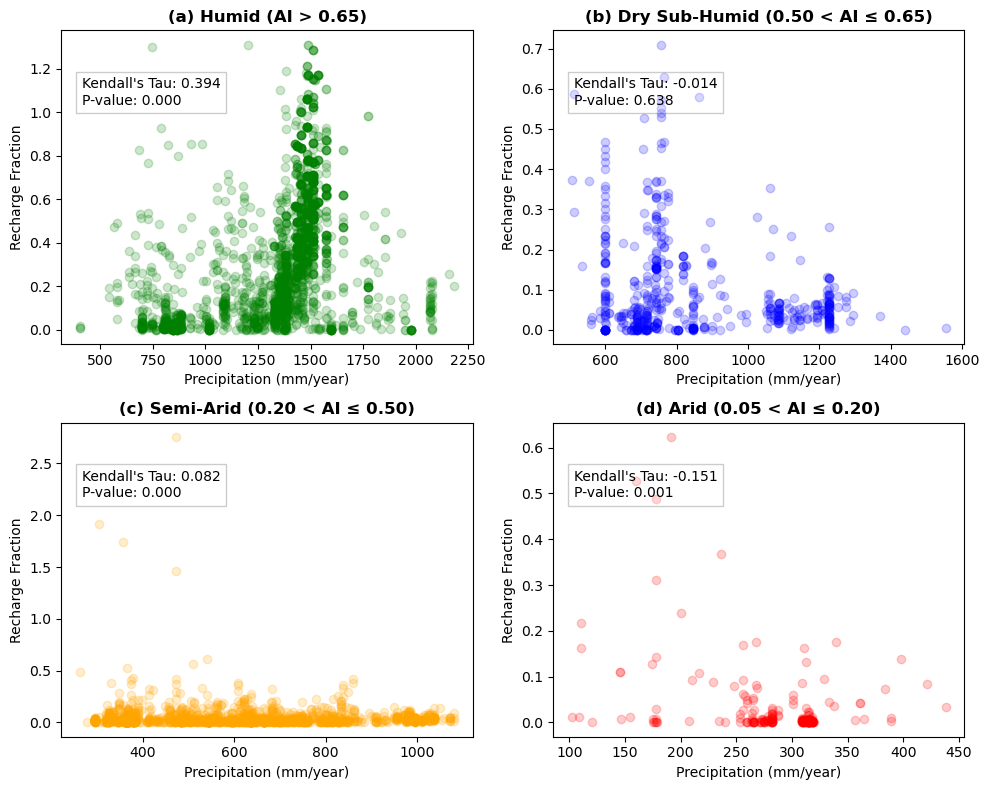

In [8]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjusted for better visibility
axes = axes.flatten()  # Flatten for easy iteration

# Labels for subplots
subplot_labels = ['a', 'b', 'c', 'd' ]

# Iterate over datasets and create scatter plots
for i, (region, (data, color)) in enumerate(datasets.items()):
    if not data.empty:  # Ensure there's data to analyze
        # Compute Kendall's Tau and p-value
        tau, p_value = stats.kendalltau(data["Precipitation"], data["Recharge fraction"])

        # Scatter plot
        axes[i].scatter(data["Precipitation"], data["Recharge fraction"], c=color, label=region, alpha=0.2)
        
        # Set title with region and AI range
        axes[i].set_title(f"({subplot_labels[i]}) {region}", fontsize=12, fontweight='bold')
        
        axes[i].set_xlabel("Precipitation (mm/year)")
        axes[i].set_ylabel("Recharge Fraction")

        # Display Kendall's Tau & p-value inside the plot
        text = f"Kendall's Tau: {tau:.3f}\nP-value: {p_value:.3f}"
        axes[i].text(0.05, 0.85, text, transform=axes[i].transAxes, fontsize=10,
                     verticalalignment='top', bbox=dict(facecolor='white', alpha=0.2))

# Adjust layout and show the plots
plt.tight_layout()
# Save the figure before displaying it
#plt.savefig("subplot_correlation.png", dpi=300, bbox_inches='tight')

plt.show()


# For Precipitation seasonality

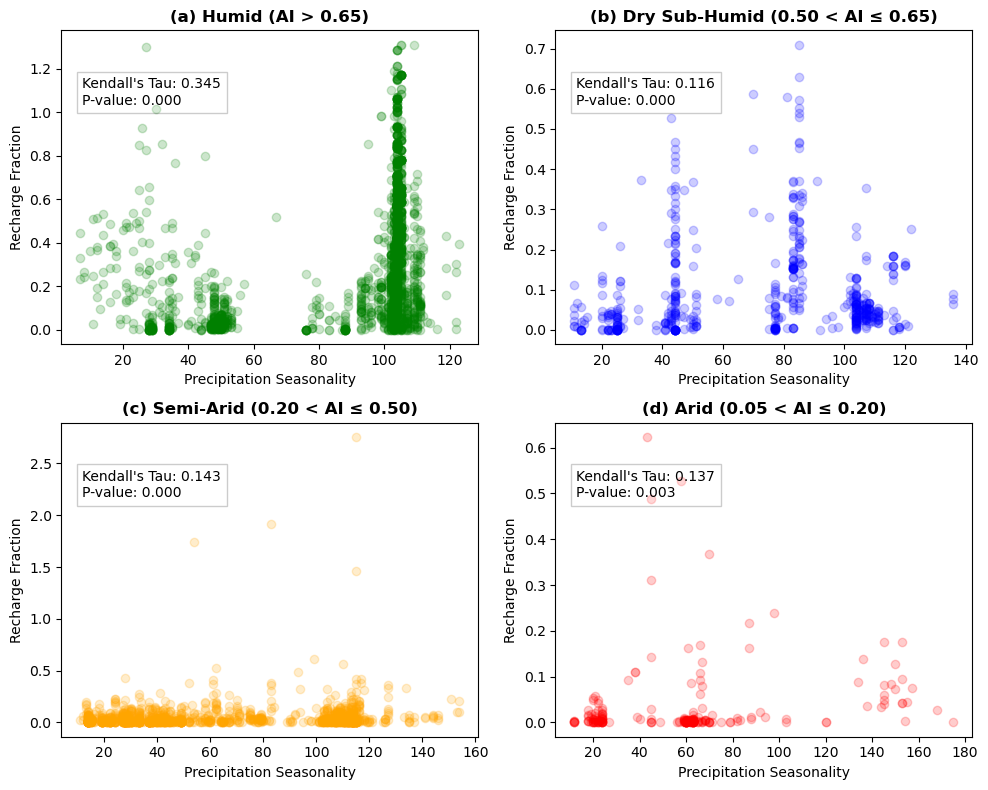

In [9]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjusted for better visibility
axes = axes.flatten()  # Flatten for easy iteration

# Labels for subplots
subplot_labels = ['a', 'b', 'c', 'd' ]

# Iterate over datasets and create scatter plots
for i, (region, (data, color)) in enumerate(datasets.items()):
    if not data.empty:  # Ensure there's data to analyze
        # Compute Kendall's Tau and p-value
        tau, p_value = stats.kendalltau(data["Prec_seasonality"], data["Recharge fraction"])

        # Scatter plot
        axes[i].scatter(data["Prec_seasonality"], data["Recharge fraction"], c=color, label=region, alpha=0.2)
        
        # Set title with region and AI range
        axes[i].set_title(f"({subplot_labels[i]}) {region}", fontsize=12, fontweight='bold')
        
        axes[i].set_xlabel("Precipitation Seasonality")
        axes[i].set_ylabel("Recharge Fraction")

        # Display Kendall's Tau & p-value inside the plot
        text = f"Kendall's Tau: {tau:.3f}\nP-value: {p_value:.3f}"
        axes[i].text(0.05, 0.85, text, transform=axes[i].transAxes, fontsize=10,
                     verticalalignment='top', bbox=dict(facecolor='white', alpha=0.2))


# Adjust layout and show the plots
plt.tight_layout()
# Save the figure before displaying it
#plt.savefig("subplot_correlation.png", dpi=300, bbox_inches='tight')

plt.show()


# For temperature seasonality

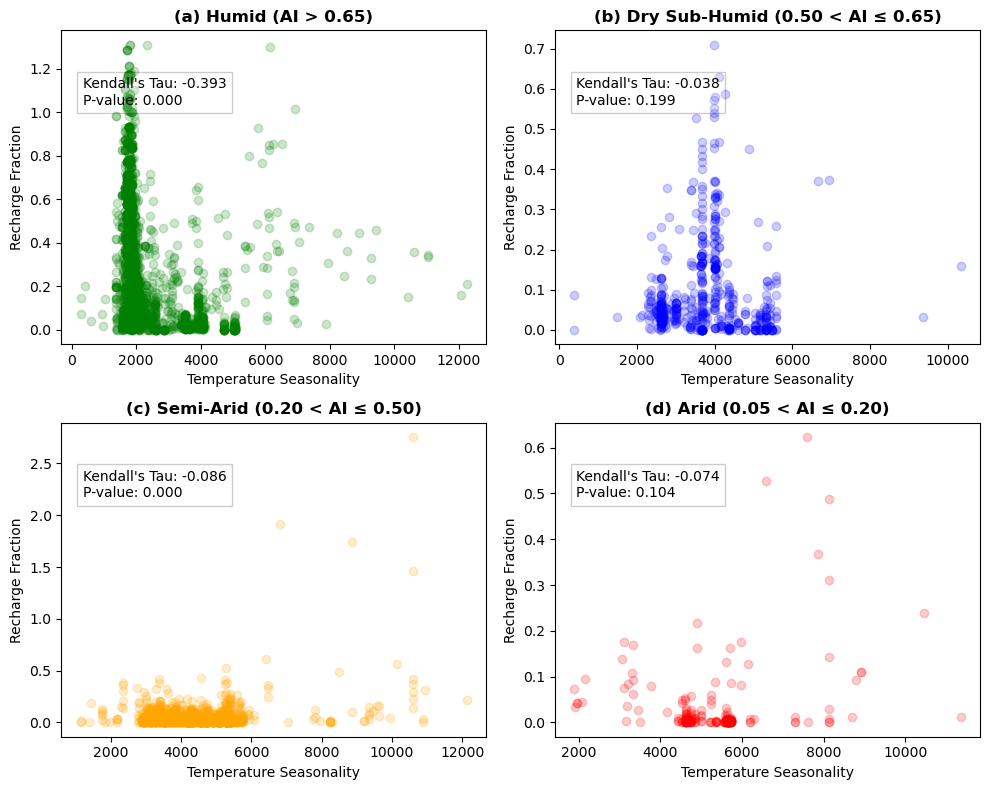

In [10]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjusted for better visibility
axes = axes.flatten()  # Flatten for easy iteration

# Labels for subplots
subplot_labels = ['a', 'b', 'c', 'd' ]

# Iterate over datasets and create scatter plots
for i, (region, (data, color)) in enumerate(datasets.items()):
    if not data.empty:  # Ensure there's data to analyze
        # Compute Kendall's Tau and p-value
        tau, p_value = stats.kendalltau(data["Temp_seasonality"], data["Recharge fraction"])

        # Scatter plot
        axes[i].scatter(data["Temp_seasonality"], data["Recharge fraction"], c=color, label=region, alpha=0.2)
        
        # Set title with region and AI range
        axes[i].set_title(f"({subplot_labels[i]}) {region}", fontsize=12, fontweight='bold')
        
        axes[i].set_xlabel("Temperature Seasonality")
        axes[i].set_ylabel("Recharge Fraction")

        # Display Kendall's Tau & p-value inside the plot
        text = f"Kendall's Tau: {tau:.3f}\nP-value: {p_value:.3f}"
        axes[i].text(0.05, 0.85, text, transform=axes[i].transAxes, fontsize=10,
                     verticalalignment='top', bbox=dict(facecolor='white', alpha=0.2))

# Adjust layout and show the plots
plt.tight_layout()
# Save the figure before displaying it
plt.savefig("subplot_correlation.png", dpi=300, bbox_inches='tight')

plt.show()


# For precipitation intensity parameter a

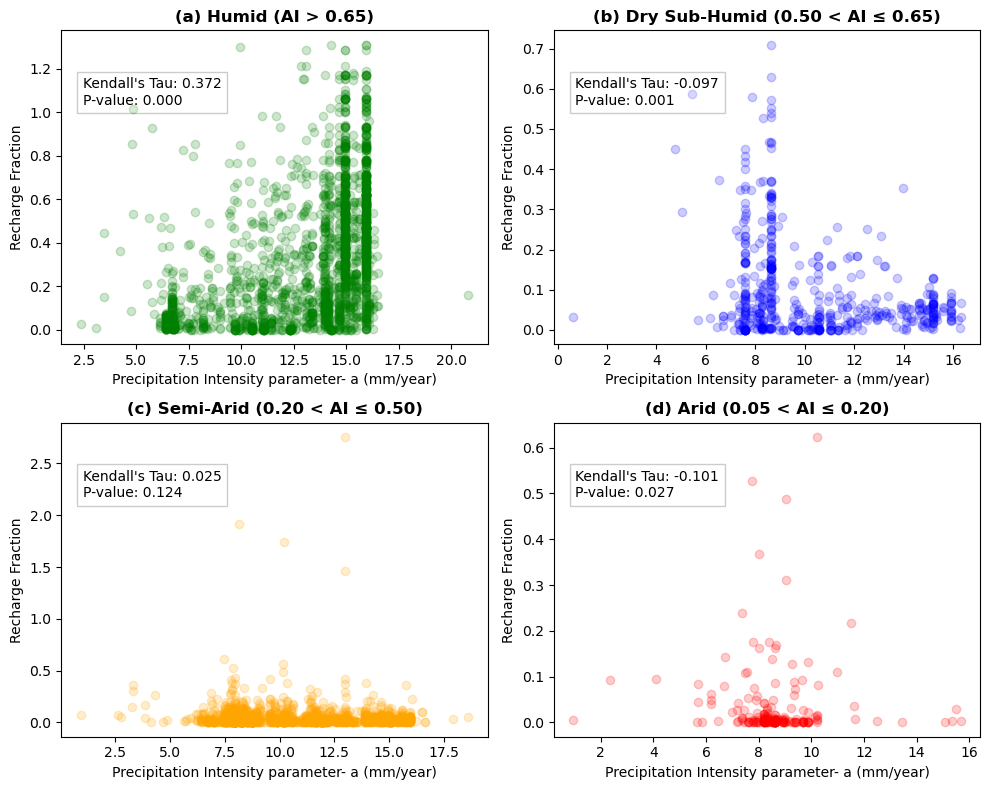

In [11]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjusted for better visibility
axes = axes.flatten()  # Flatten for easy iteration

# Labels for subplots
subplot_labels = ['a', 'b', 'c', 'd' ]

# Iterate over datasets and create scatter plots
for i, (region, (data, color)) in enumerate(datasets.items()):
    if not data.empty:  # Ensure there's data to analyze
        # Compute Kendall's Tau and p-value
        tau, p_value = stats.kendalltau(data["a"], data["Recharge fraction"])

        # Scatter plot
        axes[i].scatter(data["a"], data["Recharge fraction"], c=color, label=region, alpha=0.2)
        
        # Set title with region and AI range
        axes[i].set_title(f"({subplot_labels[i]}) {region}", fontsize=12, fontweight='bold')
        
        axes[i].set_xlabel("Precipitation Intensity parameter- a (mm/year)")
        axes[i].set_ylabel("Recharge Fraction")

        # Display Kendall's Tau & p-value inside the plot
        text = f"Kendall's Tau: {tau:.3f}\nP-value: {p_value:.3f}"
        axes[i].text(0.05, 0.85, text, transform=axes[i].transAxes, fontsize=10,
                     verticalalignment='top', bbox=dict(facecolor='white', alpha=0.2))

# Hide the last empty subplot (since we have 5 regions but a 2x3 grid)
#fig.delaxes(axes[5])

# Adjust layout and show the plots
plt.tight_layout()
# Save the figure before displaying it
#plt.savefig("subplot_correlation.png", dpi=300, bbox_inches='tight')

plt.show()
